# # 1월 24일

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
plt.style.use('seaborn')
warnings.filterwarnings('ignore')

## # 1차원 데이터
---
- 평균값(기대값), 표본 분산, 불편 분산(ddof = 1), 표준 편차
- 표본 분산은 표본의 평균을 사용해서 분산을 계산한 값으로 분산을 과소 추정하는 경향이 있으며 그 경향을 없애기 위한 것이 불편 분산. 표본 분산보다 조금 큰 값이 된다.
- 표준화 : 평균값이 큰 변수와 작은 변수가 섞여 있으면 다루기 어려우므로 표준화로 데이터를 비교하기 쉽게 한다.
- 최대값, 최소값, 중앙값, 사분위수
- 표본 분산과 불편 분산(비편향 분산)
 - 표본 분산은 표본에서 계산된 분산이며 모집단에 비해 표본수가 적을 때는 표본 분산이 모분산보다 작아진다.
 - 즉 표본 분산이 모집단 분산에 맞춰서 동일하게 보정한 것을 비편향 분산이라 한다.
 - 통계학에서는 이 비편향 분산을 사용하는 경우가 많다.
 - 불편분산은 n대신 n-1로 나누어 구할 수 있다.

[표본분산이 분산을 과소 평가하는 이유]
 - https://m.blog.naver.com/ao9364/222023124818
 - https://m.blog.naver.com/sw4r/221021838997

In [3]:
df = pd.read_csv('D:/python/cakd5/m3_통계/data/ch2_scores_em.csv')
df.head()

,student number,english,mathematics
0,1,42,65
1,2,69,80
2,3,56,63
3,4,41,63
4,5,57,76


In [4]:
scores = np.array(df.english)[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [5]:
index = list('ABCDEFGHIJ')
score_df = pd.DataFrame({'score' : scores}, index = index)
# score_df = pd.DataFrame({'score' : scores}, index = pd.index(index, name = 'student'))
score_df

,score
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65
J,58


### # 평균값
---

In [7]:
print(sum(scores) / len(scores))
print(np.mean(scores))
score_df.mean()

55.0
55.0


score    55.0
dtype: float64

### # 중앙값
---

In [9]:
sorted_scores = np.sort(scores)
sorted_scores

n = len(sorted_scores)
if n % 2 == 0:
    m0 = sorted_scores[n // 2 - 1]
    m1 = sorted_scores[n // 2]
    median = (m0 + m1) / 2
else:
    median = sorted_scores[n // 2 + 1]
    
print(median)

print(np.median(scores))
score_df.median()

56.5
56.5


score    56.5
dtype: float64

### # 최빈값
---

In [11]:
pd.Series([1, 1, 1, 2, 2, 3]).mode()

0    1
dtype: int64

### # 분산과 표준편차
---

In [12]:
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

#### # 편차
---

In [82]:
mean = np.mean(scores)
print(mean)
deviation = scores - mean
deviation

55.0


array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [83]:
# 20개 원소로 구성되는 배열을 만든 후 평균, 편차 및 편차의 합을 구하세요

a = np.random.randint(50, 101, 20)
print(a, '\n')
print(a.mean(), '\n')
print((a - a.mean()), '\n')
print((a - a.mean()).sum(), '\n')
print((a - a.mean()).mean())

[ 78  63  95  95  70  52  63 100  86  88  55  70  89  73  65  66  99  95
  84  50] 

76.8 

[  1.2 -13.8  18.2  18.2  -6.8 -24.8 -13.8  23.2   9.2  11.2 -21.8  -6.8
  12.2  -3.8 -11.8 -10.8  22.2  18.2   7.2 -26.8] 

5.684341886080802e-14 

2.842170943040401e-15


#### # 분산
---
- Numpy와 Pandas는 서로 다른 분산을 기본으로 설정하여 게산
 * Numpy는 표본 분산, Pandas는 불편 분산 
 * Pandas에서 표본 분산을 계산하려면 var 메소드의 인수를 ddof = 0이라고 설정, 불편 분산은 ddof = 1일 때 해당 (ddof : 자유도)
 * 불편 분산이 정확도가 더 높다 (불편 : 편향이 되지 않은)

##### # 표본 분산
---

In [34]:
print(deviation)
print(np.mean(deviation ** 2))
print(np.var(scores))

NameError: name 'deviation' is not defined

In [35]:
data = np.array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])
mu = np.sum(data) / len(data)
s = np.sum((data - mu) ** 2) / len(data)
s

1.2

##### # 불편 분산
---

In [85]:
score_df.var()

score    95.555556
dtype: float64

In [86]:
df = score_df.copy()
df['deviation'] = deviation
df['square of deviation'] = np.square(deviation)
df

,score,deviation,square of deviation
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0
J,58,3.0,9.0


In [36]:
df.mean()

english        58.38
mathematics    78.88
dtype: float64

In [37]:
s1 = np.sum((data - mu) ** 2) / (len(data) - 1)
s1

1.3333333333333333

##### # 표준편차
---

In [88]:
np.sqrt(np.var(scores, ddof = 0))

9.273618495495704

In [89]:
np.std(scores, ddof = 1) # 불편 분산
np.std(scores) # 표본 분산

9.273618495495704

In [17]:
df.std(ddof = 0)

student number    14.430870
english            9.701319
mathematics        8.329802
dtype: float64

##### # 범위와 4분위수 범위
---

In [91]:
np.max(scores) - np.min(scores)

28

In [18]:
scores_Q = np.percentile(scores, [25, 75])
print(scores_Q)
scores_IQR = scores_Q[1] - scores_Q[0]
print(scores_IQR)

[48.25 63.25]
15.0


In [27]:
# 요약 통계표

pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

### # 데이터 정규화, 시각화
---

In [23]:
print(f'평균 : {scores.mean()}, 표준편차 : {scores.std().round(4)}')

평균 : 55.0, 표준편차 : 9.2736


#### # 표준화
---

In [25]:
z = (scores - np.mean(scores)) / np.std(scores)
print(z, '\n') # 표준정규분포
print(z.mean(), '\n') # 평균
print(z.std(), '\n') # 표준 편차

[-1.40182605  1.50965882  0.10783277 -1.50965882  0.21566555 -0.75482941
  1.07832773 -0.64699664  1.07832773  0.32349832] 

-1.6653345369377347e-17 

0.9999999999999999 



In [96]:
print((np.mean(z), np.std(z)), '\n')
z = 50 + 10 * (scores - np.mean(scores)) / np.std(scores) # 분포의 변경
print(z, '\n')

score_df['deviation_value'] = z
score_df 

(-1.6653345369377347e-17, 0.9999999999999999) 

[35.98173948 65.09658825 51.07832773 34.90341175 52.15665546 42.45170588
 60.78327732 43.53003361 60.78327732 53.2349832 ] 



,score,deviation_value
A,42,35.981739
B,69,65.096588
C,56,51.078328
D,41,34.903412
E,57,52.156655
F,48,42.451706
G,65,60.783277
H,49,43.530034
I,65,60.783277
J,58,53.234983


In [97]:
df = pd.read_csv('D:/python/cakd5/m3_통계/data/ch2_scores_em.csv')
eng_scores = np.array(df.english)
pd.Series(eng_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [98]:
freq, _ = np.histogram(eng_scores, bins = 10, range = (0, 100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [28]:
freq_class = [f'{i} ~ {i + 10}' for i in range(0, 100, 10)]
freq_dist_df = pd.DataFrame({'frequency' : freq},
                             index = pd.Index(freq_class, name = 'class')) # 대소문자 유의
# pd.index(freq_class, name = 'class')
freq_dist_df

NameError: name 'freq' is not defined

#### # 계급값 
---
- 각 계급을 대표하는 값으로 계급의 중앙값이 이용됨

In [30]:
class_value = [(i + (i + 10)) // 2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

#### # 상대도수
---
- 해당 계급의 데이터의 상대적인 비율


In [31]:
rel_freq = freq / freq.sum()
rel_freq

NameError: name 'freq' is not defined

#### # 누적상대도수
---
-  해당 계급까지의 상대도수 합

In [102]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [33]:
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df

NameError: name 'freq_dist_df' is not defined

#### # 최빈값
---

In [104]:
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class value']

65

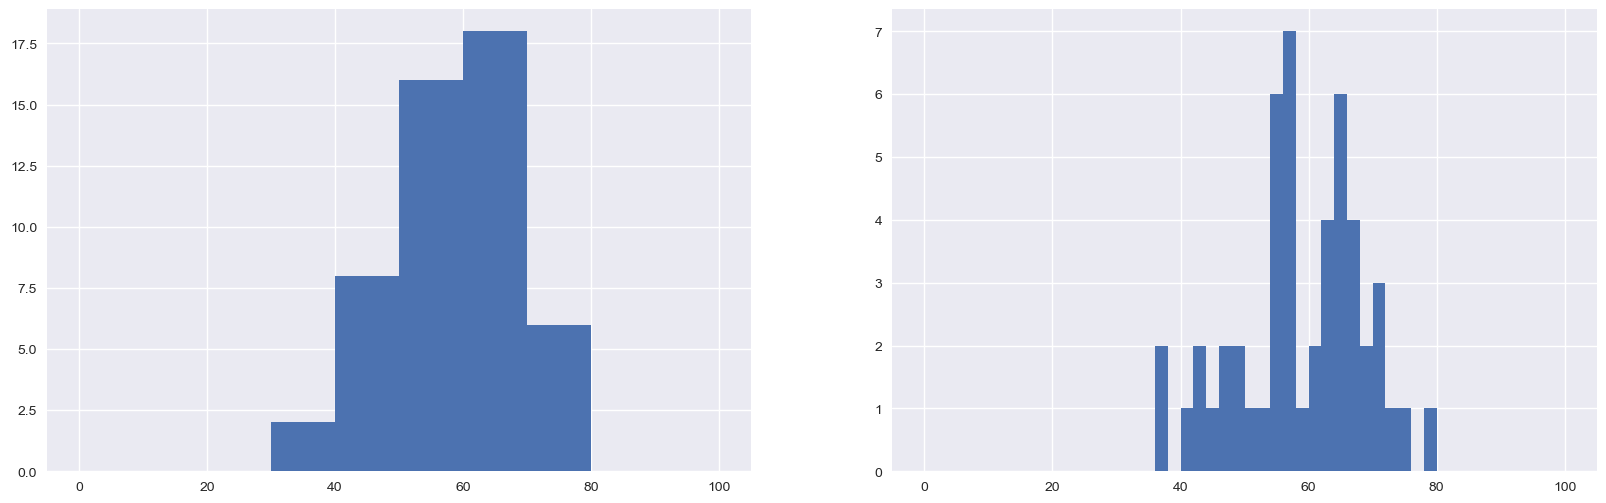

In [108]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
freq, _, _ = ax1.hist(eng_scores, bins = 10,range = (0,100))
freq, _, _ = ax2.hist(eng_scores, bins = 50,range = (0,100))
# ax.set_xlabel('score')
# ax.set_ylabel('person number')
# ax.set_xticks(np.linspace(0, 100, 10 + 1))
# ax.set_yticks(np.arange(0, freq.max() +1))

plt.show()
plt.close()


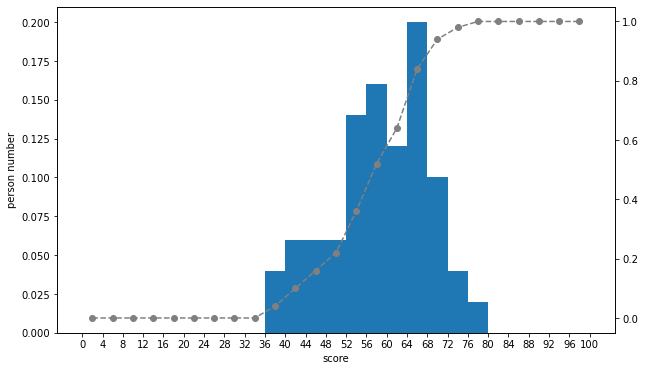

In [106]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 6))
ax1 = fig.add_subplot(111)

ax2 = ax1.twinx() # y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
weights = np.ones_like(eng_scores) / len(eng_scores) # 상대도수의 히스토그램으로 하기 위해서는 도수를 데이터의 수로 나눌 필요가 있음
rel_freq, _, _ = ax1.hist(eng_scores, bins = 25, range = (0, 100), weights = weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i + (i + 4)) // 2 for i in range(0, 100, 4)]

ax2.plot(class_value, cum_rel_freq, ls = '--', marker = 'o', color = 'gray')
ax2.grid(visible = False)

ax1.set_xlabel('score')
ax1.set_ylabel('person number')
ax1.set_xticks(np.linspace(0, 100, 25 + 1))

plt.show()
plt.close()

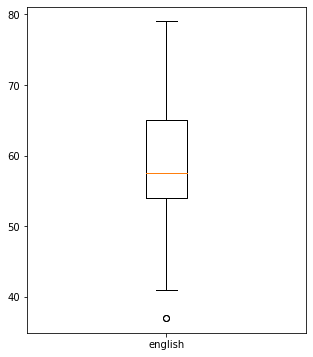

In [107]:
# 상자 그림

fig = plt.figure(figsize = (5, 6))
ax = fig.add_subplot(111)
ax.boxplot(eng_scores, labels = ['english'])
plt.show()
plt.close()

In [108]:
# 표본 분산



1.2

In [109]:
# 불편 분산



1.3333333333333333

## # 2차원 데이터
---

In [21]:
df = pd.read_csv('D:/python/cakd5/m3_통계/data/ch2_scores_em.csv', index_col = 'student number')

en_scores = np.array(df.english)[:10]
ms_scores = np.array(df.mathematics)[:10]
sdf = pd.DataFrame({'english' : en_scores, 'mathematics' : ms_scores}, index = pd.Index(list('ABCDEFGHIJ'), name = 'students'))
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


### # 공분산
---
 - np.cov(a, b) : 불편분산으로 계산한다

In [22]:
dfc = sdf.copy()
dfc['eng_deviation'] = dfc.english - dfc.english.mean()
dfc['math_deviation'] = dfc.mathematics - dfc.mathematics.mean()
dfc['product of deviation'] = dfc['eng_deviation'] * dfc['math_deviation']
display(dfc)

dfc['product of deviation'].mean()

,english,mathematics,eng_deviation,math_deviation,product of deviation
students,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


62.8

In [112]:
dfc.english.var(ddof = 0)

86.0

In [113]:
# cov 함수는 기본값이 불편 분산

cov_mat = np.cov(en_scores, ms_scores, ddof = 0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [38]:
np.var(en_scores, ddof = 0), np.var(ms_scores, ddof = 0)

(86.0, 68.44000000000001)

### # 상관계수
---

In [115]:
np.cov(en_scores, ms_scores, ddof = 0)[0, 1] / (np.std(en_scores) * np.std(ms_scores))

0.8185692341186713

In [116]:
np.corrcoef(en_scores, ms_scores)

array([[1.        , 0.81856923],
       [0.81856923, 1.        ]])

In [39]:
dfc[['english', 'mathematics']].corr()

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000


### # 데이터 시각화
---

In [40]:
df2 = dfc[['english', 'mathematics']]
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111)
ax.scatter(df2.english, df2.mathematics)
plt.show() # jupyter notebook은 자동으로 처리해주기 때문에 필요가 없지만 다른 프로그램에서는 이 코드를 입력해야 보여준다
plt.close() # 메모리에 남아있는 것을 지우기 위해 사용

NameError: name 'plt' is not defined

# # 1월 25일
---

## # 2차원 데이터
---

### # 다항곡선 회귀분석
---
https://qlsenddl-lab.tistory.com/48
- 기본문법 : np.polyfit(x, y, n)

In [128]:
df = pd.read_csv('D:/python/cakd5/m3_통계/data/ch2_scores_em.csv', index_col = 'student number')

en_scores = np.array(df.english)[:10]
ms_scores = np.array(df.mathematics)[:10]
sdf = pd.DataFrame({'english' : en_scores, 'mathematics' : ms_scores}, index = pd.Index(list('ABCDEFGHIJ'), name = 'students'))
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


#### # 회귀직선
---

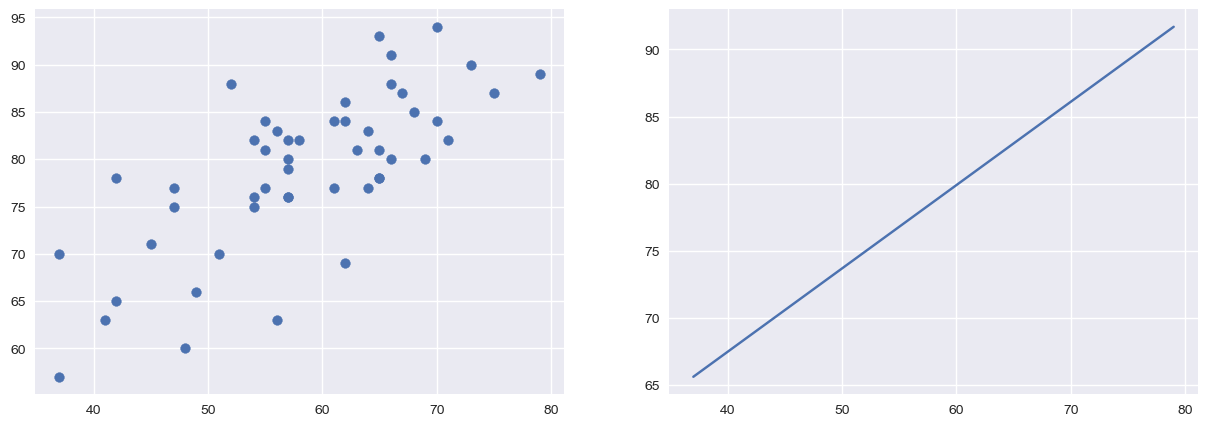

In [109]:
eng_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

# 계수 구하기
poly_fit = np.polyfit(eng_scores, math_scores, 1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(eng_scores.min(), eng_scores.max())
ys = poly_1d(xs)

fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(eng_scores, math_scores)
ax2.plot(xs, ys)
# ax.set_xlabel('english')
# ax.set_ylabel('mathematics')
plt.show()

Figure(1800x600) [<AxesSubplot:> <AxesSubplot:>]


<AxesSubplot:xlabel='english', ylabel='mathematics'>

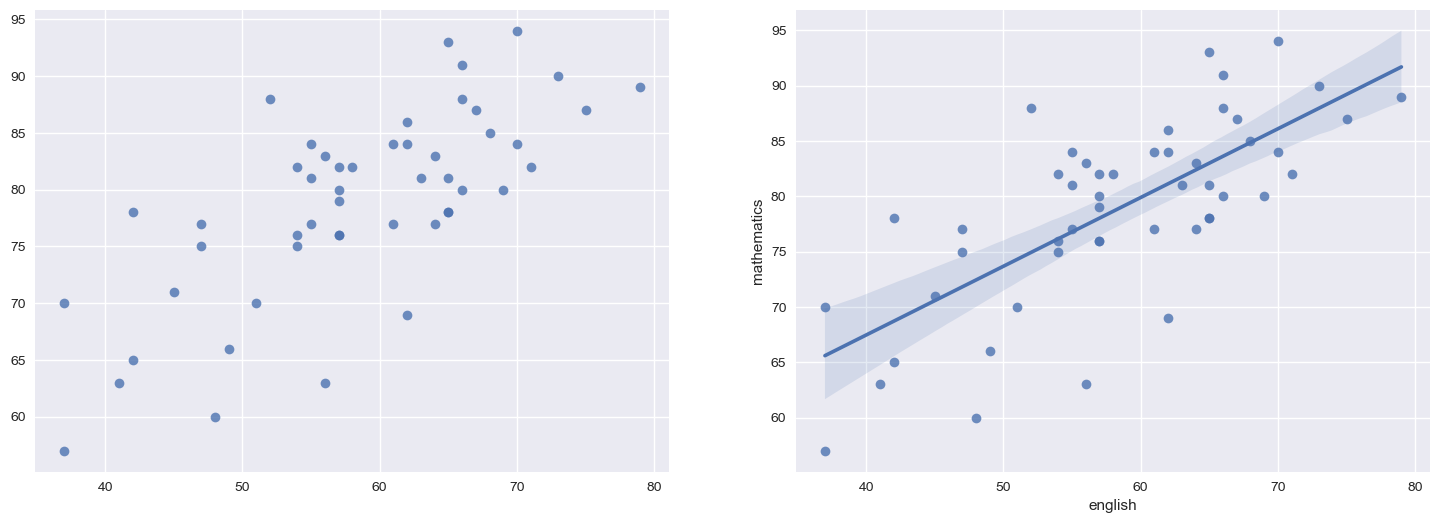

In [132]:
fig, axes = plt.subplots(1, 2, figsize = (18, 6), sharex = True)
print(fig, axes)
sns.regplot(ax = axes[0], x = eng_scores, y = math_scores, fit_reg = False)
sns.regplot(ax = axes[1], x = df.english, y = df.mathematics)

#### # 히트맵
---

(array([[1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 1., 0., 0., 0.],
       [0., 1., 1., 1., 2., 0., 0., 0.],
       [0., 0., 0., 1., 2., 1., 1., 0.],
       [0., 1., 0., 0., 4., 6., 0., 0.],
       [0., 0., 1., 0., 2., 4., 1., 0.],
       [0., 0., 0., 0., 2., 3., 3., 2.],
       [0., 0., 0., 0., 0., 2., 0., 2.],
       [0., 0., 0., 0., 0., 0., 2., 0.]]), array([35., 40., 45., 50., 55., 60., 65., 70., 75., 80.]), array([55., 60., 65., 70., 75., 80., 85., 90., 95.]), <matplotlib.collections.QuadMesh object at 0x000001FE5C970250>)


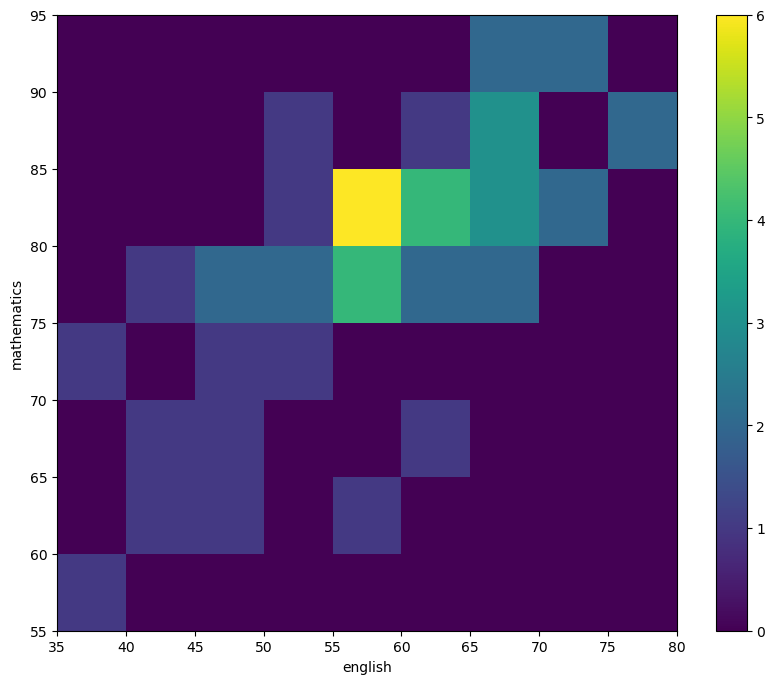

In [117]:
plt.style.use('default')
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(eng_scores, math_scores, bins = [9, 8], range = [(35, 80), (55, 95)])
print(c)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
fig.colorbar(c[3], ax = ax)

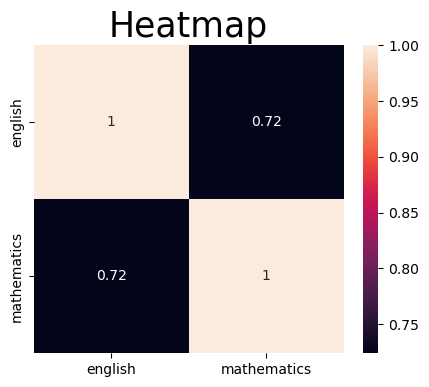

In [118]:
plt.figure(figsize=(5,4))
sns.heatmap(df.corr(), annot=True)
plt.title('Heatmap', fontsize = 25)
plt.show()
plt.close()

In [133]:
anscombe_data = np.load('D:/python/cakd5/m3_통계/data/ch3_anscombe.npy')
print(anscombe_data.shape)
anscombe_data[0]

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

#### # 상관계수와 관계성
---
- 상관계수가 같은 데이터라도 그래프를 그려보면 모양이 다르다

In [120]:
stats_df = pd.DataFrame(index = ['X_mean', 'X_variance', 'Y_mean', 'Y_variance', 'X&Y_correlation', 'X&Y_regression line'])
for i, data in enumerate(anscombe_data):
    dataX = data[:, 0]
    dataY = data[:, 1]
    poly_fit = np.polyfit(dataX, dataY, 1)
    stats_df[f'data{i + 1}'] = [f'{np.mean(dataX):.2f}',
                                f'{np.var(dataX):.2f}',
                                f'{np.mean(dataY):.2f}',
                                f'{np.var(dataY):.2f}',
                                f'{np.corrcoef(dataX, dataY)[0, 1]:.2f}',
                                f'{poly_fit[1]:.2f} + {poly_fit[0]:.2f}x']
                                
stats_df

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00 + 0.50x,3.00 + 0.50x,3.00 + 0.50x,3.00 + 0.50x


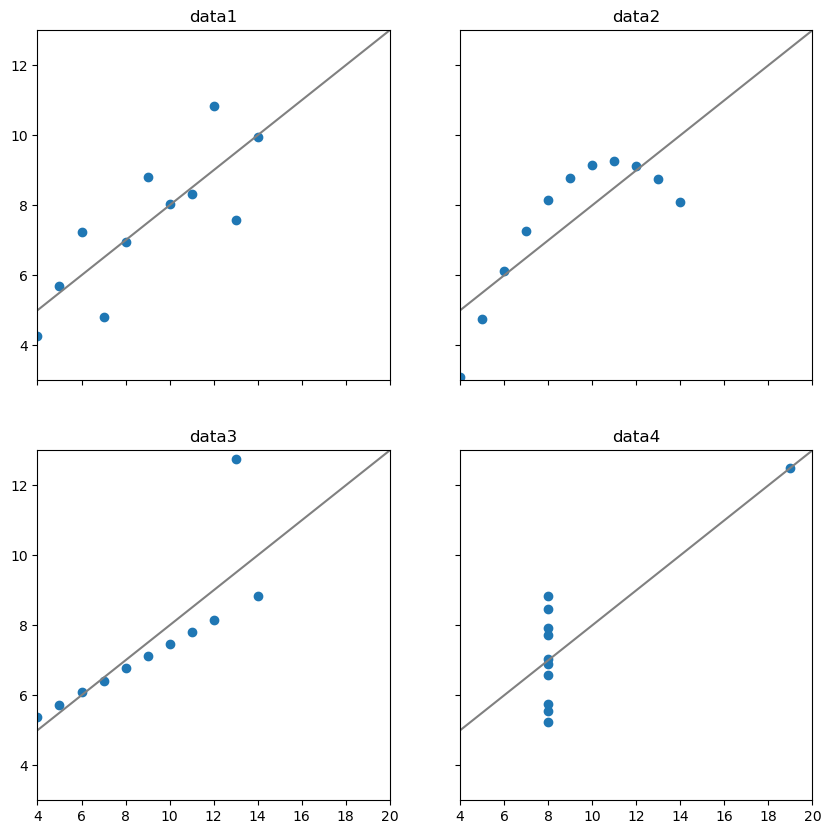

In [121]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10), sharex = True, sharey = True)
xs = np.linspace(0, 30, 100)
for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:, 0], data[:, 1], 1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    ax = axes[i // 2, i % 2]
    ax.set_xlim([4, 20])
    ax.set_ylim([3, 13])
    ax.set_title(f'data{i + 1}')
    ax.scatter(data[:,0],data[:,1])
    ax.plot(xs, ys, color = 'gray')

plt.show()

In [122]:
# species 그룹별 통계량을 구하세요

fdf = pd.read_csv('D:/python/cakd5/m3_통계/data/5_2_fm.csv')
display(fdf)

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10


In [124]:
# A
A = fdf.loc[fdf['species'] == 'A']

# 평균
print(A['length'].mean(), '\n')

# 중앙값
print(A['length'].median(), '\n')

# 분산
print(A['length'].var(), '\n')

# 표준편차
print(A['length'].std(), '\n')

# 4분위값
print(A['length'].quantile((0, 0.25, 0.5, 0.75, 1)), '\n')


# B 
B = fdf.loc[fdf['species'] == 'B']

# 평균
print(B['length'].mean(), '\n')

# 중앙값
print(B['length'].median(), '\n')

# 분산
print(B['length'].var(), '\n')

# 표준편차
print(B['length'].std(), '\n')

# 4분위값
print(B['length'].quantile((0, 0.25, 0.5, 0.75, 1)))

fdf.groupby(fdf['species']).describe()

3.0 

3.0 

1.0 

1.0 

0.00    2.0
0.25    2.5
0.50    3.0
0.75    3.5
1.00    4.0
Name: length, dtype: float64 

8.0 

8.0 

4.0 

2.0 

0.00     6.0
0.25     7.0
0.50     8.0
0.75     9.0
1.00    10.0
Name: length, dtype: float64


length                                    
         count mean  std  min  25%  50%  75%   max
species                                           
A          3.0  3.0  1.0  2.0  2.5  3.0  3.5   4.0
B          3.0  8.0  2.0  6.0  7.0  8.0  9.0  10.0

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9


sales
store color       
osaka blue      13
      red        9
tokyo blue      10
      red       15

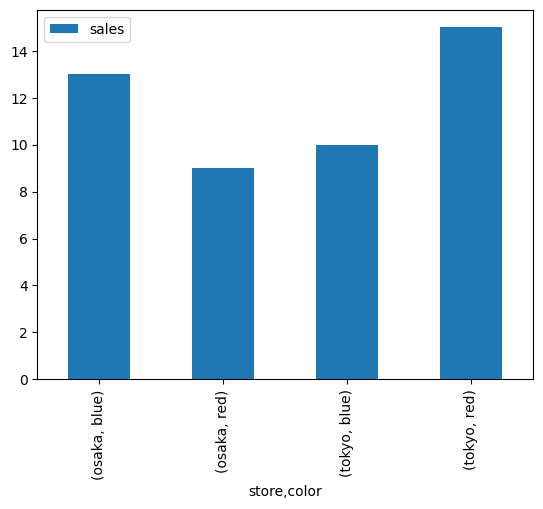

In [126]:
# 각 store의 컬러별 판매량을 파악할 수 있는 피봇 테이블을 작성

sdf = pd.read_csv('D:/python/cakd5/m3_통계/data/5_2_shoes.csv')
display(sdf)

sdf1 = sdf.pivot_table(values = 'sales',
                       index = ['store', 'color'])
sdf1.plot(kind = 'bar')
sdf1

In [127]:
# x, y의 공분산과 상관행렬

cdf = pd.read_csv('D:/python/cakd5/m3_통계/data/4_cov.csv')
display(cdf.head())

display(cdf.cov())
display(cdf.corr())

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45


,x,y
x,3.646222,7.673333
y,7.673333,28.011111


,x,y
x,1.000000,0.759272
y,0.759272,1.000000


## # 그래프 배경 타입
---
- plt.style.available
- import matplotlib as mpl / mpl.rcParams.update(mpl.rcParamsDefault) - 초기화

In [90]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']